# Конспект лекции

# Фотонные кристаллы и другие периодические структуры

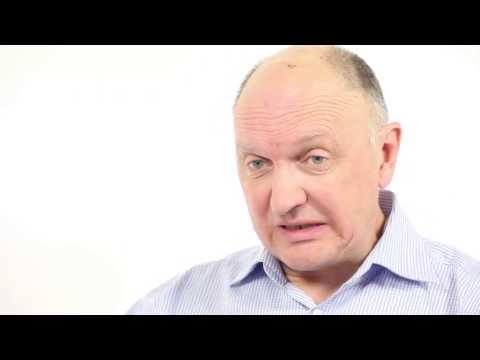

In [2]:
# Рассказ о фотонных кристаллах, аналогии с периодической структурой кристалла,
# особенностях распространения электромагнитных волн в фотонных кристаллах,
# состояниях в запрещенной зоне фотонного кристалла, фононных, магнонных кристаллах
# распространение света в метаматериалах

from IPython.lib.display import YouTubeVideo
YouTubeVideo('ufppOGpi2gM')

Фотонные кристаллы (англ. photonic crystals) — материалы с упорядоченной структурой, характеризующейся строго периодическим изменением коэффициента преломления в масштабах, сопоставимых с длинами волн излучений в видимом и инфракрасном диапазонах. В зависимости от размерности таких периодических изменений, выделяют одно-, двух и трехмерные (обозначаемые соответственно 1D-, 2D- и 3D-) ФК.

Будучи прозрачными для широкого диапазона длин волн электромагнитного излучения, ФК не пропускают фотоны с определенными длинами волн, сравнимыми с периодом структуры. Такой спектральный диапазон получил название «фотонная запрещенная зона» или «стоп-зона». Чем больше разница показателей преломления материалов ФК, тем шире стоп-зона, а чем больше количество чередующихся слоев, тем выше значения отражательной способности структуры для фотонов с энергиями, соответствующими стоп-зоне. Как материалы слоев наиболее часто используются диоксид кремния SiO$_2$ и диоксид титана TiO$_2$ (показатели преломления в видимой области составляют приблизительно  1,5 и 2,4 соответственно). Вместо TiO$_2$  также применяются диоксид циркония ZrO$_2$ ($n$ = 2,1-2,3) и диоксид гафния HfO$_2$ ($n$ = 1,9-2,1).

В оптике нередко нужны узкополосные фильтры, пропускающие фотоны в узком интервале длин волн шириной в единицы нм. Для получения такого узкополосного фильтра в структуру ФК вносят дефекты: 1) изменяют порядок следования слоев, из-за чего возникают области удвоенной (утроенной, учетверенной и т.д.) толщины, 2) включают в структуру слои из другого материала или другой толщины. Вводимый слой может обладать активными свойствами, к примеру, фотолюминесценцией. Для этих целей используются слои материала, допированные редкоземельным металлом, например, эрбием Er или европием Eu или слои квантовых точек. Для создания оптических детекторов могут использоваться пористые слои  или другие структуры, получаемые методами электрохимического травления, изменяющие показатель преломления при заполнении пор той или иной жидкостью с различными значениями диэлектрической проницаемости.

Оптические свойства одномерного ФК рассмотрим подробнее, пусть диэлектрическая проницаемость слоев изменяется только в направлении $z$. Показатели преломления чередующихся слоев обозначим $n_1$ и $n_2$, при этом все слои однородны по оптическим свойствам и имеют геометрические толщины $d_1$ и $d_2$ соответственно, сумма которых создает структура с периодом $a= d_1 + d_2$.

Геометрические размеры слоев в направлении $x$ и $y$ много больше, чем длины волн электромагнитного излучения, воздействующего на структуру, то есть не имеется какой-либо локализации электромагнитного поля в этих направлениях.

Рассмотрим свойства электромагнитных волн в среде с периодическим
изменением диэлектрической проницаемости  $
\varepsilon (x) = \varepsilon(x+a) $ вдоль направления распространения.

Запишем волновое уравнение:
$$
\nabla^2 E(x,t) + \frac{1}{c_2}\varepsilon(x)\frac{\partial^2 E(x,t)}{\partial t^2}=0.
$$
где $\omega$ — частота поля, $t$ — время. Для электромагнитных волн вида $E(x,t) = E(x)e^{i\omega t}$ волновое уравнение принимает вид уравнения Гельмгольца
$$
\nabla^2 E(x) + \varepsilon(x)\frac{\omega _2 }{\partial c^2}E(x,t)=0.
$$

Как улучшить лабораторную работу:
- рассмотреть структуры со смешением
- визуализировать структуры


# Лабораторная работа

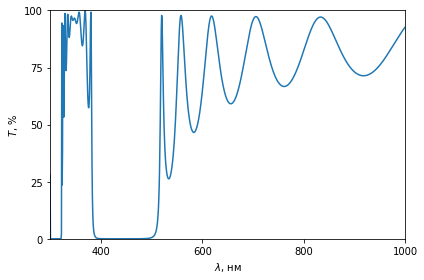

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


indices = {'air': '1*x/x',
           'SiO2': 'np.sqrt(1+0.6961663/(1-np.power(0.0684043/x, 2))+0.4079426/(1-np.power(0.116241/x,2))+0.8974794/(1-np.power(9.896161/x,2)))',
           'TiO2': 'np.sqrt(5.913+0.2441/(np.power(x, 2)-0.0803))'}

def n(material, x):
    nL = lambda x: eval(indices[material])
    return nL(x)


def dot_product(M, B):
    return np.array([[M[0,0,:]*B[0,0,:]+M[0,1,:]*B[1,0,:],
                   M[0,0,:]*B[0,1,:]+M[0,1,:]*B[1,1,:]],
                  [M[1,0,:]*B[0,0,:]+M[1,1,:]*B[1,0,:],
                   M[1,0,:]*B[0,1,:]+M[1,1,:]*B[1,1,:]]])


def A(wavelengths, material_1, material_2):
    n1 = n(material_1, wavelengths)
    n2 = n(material_2, wavelengths)
    return [[n2+n1, n2-n1],
            [n2-n1, n2+n1]]/(2*n2)


def B(wavelengths, material, L):
    nm = n(material, wavelengths)
    return np.array([[np.exp(2*np.pi*1j*nm*L/wavelengths),
                      np.zeros(nm.size)],
                     [np.zeros(nm.size),
                      np.exp(-2*np.pi*1j*nm*L/wavelengths)]])


def M(structure, wavelengths):
    materials = structure[0::2]
    thicknesses = np.array(structure[1::2])/1000
    matrix_M = A(wavelengths, materials[0], materials[1])
    for i in range(len(materials)-2):
        matrix_B = B(wavelengths, materials[i+1], thicknesses[i+1])
        matrix_M = dot_product(matrix_M, matrix_B)
        matrix_A = A(wavelengths, materials[i+1], materials[i+2])
        matrix_M = dot_product(matrix_M, matrix_A)
    return matrix_M


def T(structure):
    wavelengths = np.linspace(0.3, 1.0, num=1000)
    M_matrix = M(structure, wavelengths)
    T = 1 - np.abs(-M_matrix[1, 0]/M_matrix[1, 1])**2
    plt.xlabel(r'$\lambda$, нм')
    plt.ylabel(r'$T$, %')
    plt.xticks([400, 600, 800, 1000])
    plt.yticks([0, 25, 50, 75, 100])
    plt.axis([300, 1000, 0, 100])
    plt.plot(wavelengths*1000, T*100)
    plt.tight_layout()
    plt.show()


structure = ['SiO2', 1000, #name of material and thickness in microns
             'TiO2', 50,
             'SiO2', 50,
             'TiO2', 50,
             'SiO2', 50,
             'TiO2', 50,
             'SiO2', 50,
             'TiO2', 50,
             'SiO2', 50,
             'TiO2', 50,
             'SiO2', 50,
             'TiO2', 50,
             'SiO2', 50,
             'TiO2', 50,
             'SiO2', 50,
             'TiO2', 50,
             'SiO2', 50,
             'TiO2', 50,
             'SiO2', 50,
             'TiO2', 50,
             'SiO2', 50,
             'air', 1]


T(structure)

Задача: сравнить - зададим нечеткую границу смешения материалов сложив и поделив на два показатели преломления - увеличивая толщину размытия

Задача: Представим, что нам необходимо создать фильтр на определенный диапазон. Или еще более сложная задача: пропускание в одной части спектра и полное отражение в остальной. Как нам найти необходимую толщину?

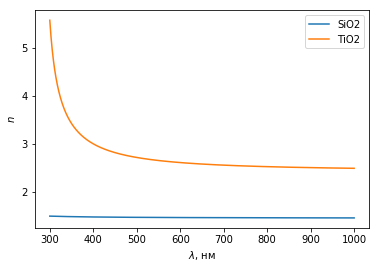

In [11]:
wavelengths = np.linspace(0.3, 1.0, num=1000)
materials = ['SiO2', 'TiO2']

for material in materials:
    plt.plot(wavelengths*1000, n(material, wavelengths), label=material)

plt.xlabel('$\lambda$, нм')
plt.ylabel('$n$')
plt.legend()
plt.show()

# Упражнения и задачи

# Литература